<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 118.2 MB/s eta 0:00:00


In [2]:
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 38.8 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-12-02 09:27:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  47.9MB/s    in 3.5s    

2025-12-02 09:27:37 (43.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
pd.set_option('display.max_columns', None)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



In [7]:
##Write your code here
df_filter = df[['JobSatPoints_6', 'JobSatPoints_7', 'Age']].dropna()
df_filter

,JobSatPoints_6,JobSatPoints_7,Age
1,0.0,0.0,35-44 years old
10,25.0,10.0,35-44 years old
12,30.0,0.0,35-44 years old
15,0.0,0.0,45-54 years old
18,60.0,10.0,25-34 years old
...,...,...,...
65178,0.0,0.0,45-54 years old
65218,0.0,0.0,25-34 years old
65265,60.0,70.0,18-24 years old
65351,0.0,0.0,25-34 years old


In [8]:
df_trial = df_filter.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].mean()
df_trial

,JobSatPoints_6,JobSatPoints_7
Age,,
18-24 years old,25.465361,27.942308
25-34 years old,25.666562,23.719651
35-44 years old,23.264173,20.770169
45-54 years old,20.870773,19.679277
55-64 years old,22.581301,20.363821
65 years or older,23.798319,22.142857
Prefer not to say,12.294118,13.862745
Under 18 years old,18.052632,20.565789


<Figure size 1200x800 with 0 Axes>

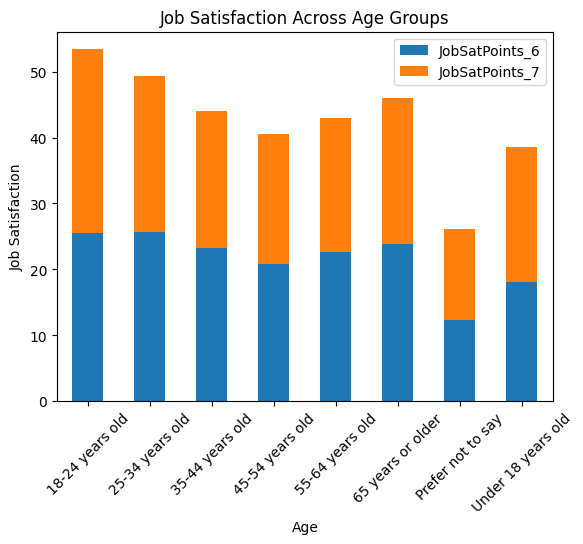

In [9]:
plt.figure(figsize=(12, 8))
df_trial.plot(kind='bar', stacked=True)
plt.title('Job Satisfaction Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


In [10]:
##Write your code here
df_filter = df[['JobSatPoints_6', 'JobSatPoints_7', 'Employment']].dropna()
df_filter

,JobSatPoints_6,JobSatPoints_7,Employment
1,0.0,0.0,"Employed, full-time"
10,25.0,10.0,"Employed, full-time"
12,30.0,0.0,"Employed, full-time"
15,0.0,0.0,"Employed, full-time"
18,60.0,10.0,"Employed, full-time"
...,...,...,...
65178,0.0,0.0,"Employed, full-time"
65218,0.0,0.0,"Employed, full-time"
65265,60.0,70.0,"Employed, full-time"
65351,0.0,0.0,"Employed, full-time;Independent contractor, fr..."


In [11]:
df_filter['Employment'].unique()

array(['Employed, full-time', 'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time',
       'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Employed, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed',
       'Student, part-time;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Not employed, but looking for work', 'Employed, part-time',
       'Student, full-time;Independent contractor, freelancer, or self-employed',
       'Student, full-time;Employed, part-time',
       'Independent contr

In [12]:
df_filter['Employment'] = df_filter['Employment'].str.split(';')
df_expl = df_filter.explode('Employment')
df_expl['Employment'] = df_expl['Employment'].str.strip()
df_expl['Employment'].unique()

array(['Employed, full-time', 'Student, part-time',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time', 'Employed, part-time',
       'Not employed, but looking for work', 'Retired',
       'Not employed, and not looking for work'], dtype=object)

In [13]:
map_emp = {
    'Employed, full-time': 'Employed, full-time',
    'Student, part-time': 'Student, part-time',
    'Independent contractor, freelancer, or self-employed': 'Independent contractor,\n freelancer,\n or self-employed',
    'Student, full-time': 'Student, full-time', 
    'Employed, part-time': 'Employed, part-time',
    'Not employed, but looking for work': 'Not employed,\n but looking for work',
    'Retired': 'Retired',
    'Not employed, and not looking for work': 'Not employed,\n and not looking for work'
}
df_expl['Employment'] = df_expl['Employment'].map(map_emp)

In [14]:
df_plot = df_expl.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].mean()
df_plot

,JobSatPoints_6,JobSatPoints_7
Employment,,
"Employed, full-time",24.407637,22.943472
"Employed, part-time",23.867863,24.811854
"Independent contractor,\n freelancer,\n or self-employed",24.636829,23.861423
"Not employed,\n and not looking for work",19.640000,14.640000
"Not employed,\n but looking for work",25.202703,22.959459
Retired,24.080000,26.040000
"Student, full-time",22.174858,26.014178
"Student, part-time",24.080797,25.578174


<Figure size 1200x800 with 0 Axes>

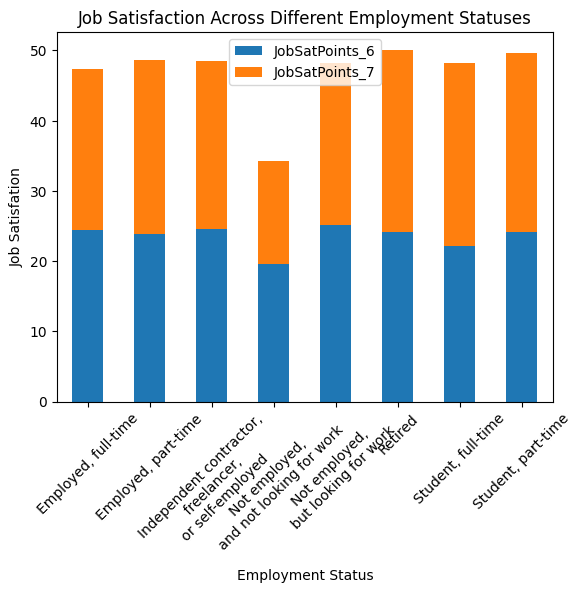

In [15]:
plt.figure(figsize=(12, 8))
df_plot.plot(kind='bar', stacked=True)
plt.title('Job Satisfaction Across Different Employment Statuses')
plt.xlabel('Employment Status')
plt.ylabel('Job Satisfation')
plt.xticks(rotation=45)
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [16]:
##Write your code here
df_filter = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].dropna()
df_filter

,ConvertedCompYearly,JobSatPoints_6,Age
72,7322.0,65.0,18-24 years old
379,91295.0,0.0,35-44 years old
389,110000.0,20.0,25-34 years old
392,161044.0,30.0,35-44 years old
398,195000.0,30.0,45-54 years old
...,...,...,...
41178,9711.0,80.0,18-24 years old
41180,44640.0,0.0,25-34 years old
41184,170000.0,20.0,45-54 years old
41186,12000.0,20.0,18-24 years old


In [17]:
## removing outliers from ConvertedCompYearly
q1 = df_filter['ConvertedCompYearly'].quantile(.25)
q3 = df_filter['ConvertedCompYearly'].quantile(.75)
iqr = q3 - q1
bound_low = q1 - 1.5*iqr
bound_hig = q3 + 1.5*iqr
df_filter = df_filter[(df_filter['ConvertedCompYearly'] <= bound_hig) & (df_filter['ConvertedCompYearly'] >= bound_low)]


In [18]:
df_filter['Age'].unique()

array(['18-24 years old', '35-44 years old', '25-34 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Under 18 years old', 'Prefer not to say'], dtype=object)

In [19]:
df_filter = df_filter[df_filter['Age'] == '25-34 years old']

In [20]:
df_filter = df_filter.set_index('Age')

In [21]:
df_filter

,ConvertedCompYearly,JobSatPoints_6
Age,,
25-34 years old,110000.0,20.0
25-34 years old,29000.0,0.0
25-34 years old,66592.0,30.0
25-34 years old,146496.0,30.0
25-34 years old,69814.0,30.0
...,...,...
25-34 years old,17945.0,0.0
25-34 years old,50000.0,25.0
25-34 years old,62296.0,5.0


In [22]:
#binning the data to better visualization
bins_comp = np.linspace(min(df_filter['ConvertedCompYearly']), max(df_filter['ConvertedCompYearly']),10)
comp_name = [f"{bins_comp[i]:.0f} to {bins_comp[i + 1]:.0f}" for i in range(len(bins_comp) - 1)]
df_filter['ConvertedCompYearly_bin'] = pd.cut(df_filter['ConvertedCompYearly'], bins_comp, labels=comp_name, include_lowest=True)

In [23]:
#binning the data to better visualization
bins_sat = np.linspace(min(df_filter['JobSatPoints_6']), max(df_filter['JobSatPoints_6']),10)
sat_name = [f"{bins_sat[i]:.0f} to {bins_sat[i + 1]:.0f}" for i in range(len(bins_sat) - 1)]
df_filter['JobSatPoints_6_bin'] = pd.cut(df_filter['JobSatPoints_6'], bins_sat, labels=sat_name, include_lowest=True)

In [24]:
df_filter.drop(['ConvertedCompYearly', 'JobSatPoints_6'], axis=1, inplace=True)

In [25]:
count_data = df_filter.groupby(['JobSatPoints_6_bin','ConvertedCompYearly_bin' ]).size().unstack(fill_value=0)

/tmp/ipykernel_299/1338732657.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df_filter.groupby(['JobSatPoints_6_bin','ConvertedCompYearly_bin' ]).size().unstack(fill_value=0)


<Figure size 1500x1000 with 0 Axes>

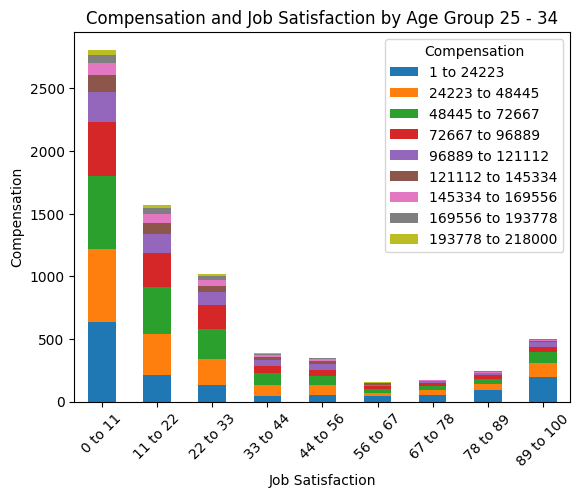

In [26]:
plt.figure(figsize=(15, 10))
count_data.plot(kind='bar', stacked=True)
plt.title('Compensation and Job Satisfaction by Age Group 25 - 34')
plt.xlabel('Job Satisfaction')
plt.ylabel('Compensation')
plt.legend(title='Compensation')
plt.xticks(rotation=45)
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


In [27]:
##Write your code here
df_filter = df[['ConvertedCompYearly', 'JobSat', 'Age']].dropna()
df_filter

,ConvertedCompYearly,JobSat,Age
72,7322.0,10.0,18-24 years old
379,91295.0,10.0,35-44 years old
389,110000.0,10.0,25-34 years old
392,161044.0,7.0,35-44 years old
398,195000.0,5.0,45-54 years old
...,...,...,...
41175,15637.0,6.0,18-24 years old
41178,9711.0,0.0,18-24 years old
41184,170000.0,9.0,45-54 years old
41186,12000.0,3.0,18-24 years old


In [28]:
## removing outliers from ConvertedCompYearly
q1 = df_filter['ConvertedCompYearly'].quantile(.25)
q3 = df_filter['ConvertedCompYearly'].quantile(.75)
iqr = q3 - q1
bound_low = q1 - 1.5*iqr
bound_hig = q3 + 1.5*iqr
df_filter = df_filter[(df_filter['ConvertedCompYearly'] <= bound_hig) & (df_filter['ConvertedCompYearly'] >= bound_low)]

In [29]:
## normalize the data to avoid bias 
df_filter['ConvertedCompYearly'] = (df_filter['ConvertedCompYearly'] - df_filter['ConvertedCompYearly'].min()) / (df_filter['ConvertedCompYearly'].max() - df_filter['ConvertedCompYearly'].min())
df_filter['JobSat'] = (df_filter['JobSat'] - df_filter['JobSat'].min()) / (df_filter['JobSat'].max() - df_filter['JobSat'].min())

/tmp/ipykernel_299/462096154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['ConvertedCompYearly'] = (df_filter['ConvertedCompYearly'] - df_filter['ConvertedCompYearly'].min()) / (df_filter['ConvertedCompYearly'].max() - df_filter['ConvertedCompYearly'].min())
/tmp/ipykernel_299/462096154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['JobSat'] = (df_filter['JobSat'] - df_filter['JobSat'].min()) / (df_filter['JobSat'].max() - df_filter['JobSat'].min())


In [30]:
df_plot = df_filter.groupby('Age')[['ConvertedCompYearly', 'JobSat']].mean()
df_plot

,ConvertedCompYearly,JobSat
Age,,
18-24 years old,0.162728,0.669884
25-34 years old,0.298962,0.683531
35-44 years old,0.401528,0.699927
45-54 years old,0.455621,0.704260
55-64 years old,0.513220,0.738117
65 years or older,0.525301,0.780769
Prefer not to say,0.572023,0.742857
Under 18 years old,0.076581,0.711111


<Figure size 1200x800 with 0 Axes>

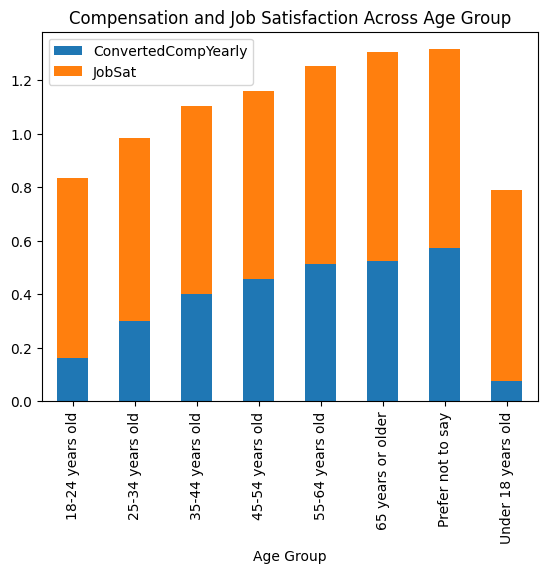

In [31]:
plt.figure(figsize=(12, 8))
df_plot.plot(kind='bar', stacked=True)
plt.title('Compensation and Job Satisfaction Across Age Group')
plt.xlabel('Age Group')
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [32]:
##Write your code here
df_filter = df[['Age', 'DatabaseWantToWorkWith']].dropna()
df_filter

,Age,DatabaseWantToWorkWith
1,35-44 years old,PostgreSQL
2,45-54 years old,Firebase Realtime Database
3,18-24 years old,MongoDB;MySQL;PostgreSQL
4,18-24 years old,PostgreSQL;SQLite
5,Under 18 years old,Cloud Firestore
...,...,...
65421,25-34 years old,Dynamodb
65427,25-34 years old,BigQuery;Cassandra;Databricks SQL;DuckDB;Elast...
65431,45-54 years old,Elasticsearch;PostgreSQL;Redis
65435,18-24 years old,PostgreSQL;SQLite


In [33]:
df_filter['DatabaseWantToWorkWith'] = df_filter['DatabaseWantToWorkWith'].str.split(';')
df_expl = df_filter.explode('DatabaseWantToWorkWith')
df_expl['DatabaseWantToWorkWith'] = df_expl['DatabaseWantToWorkWith'].str.strip()
df_expl

,Age,DatabaseWantToWorkWith
1,35-44 years old,PostgreSQL
2,45-54 years old,Firebase Realtime Database
3,18-24 years old,MongoDB
3,18-24 years old,MySQL
3,18-24 years old,PostgreSQL
...,...,...
65435,18-24 years old,PostgreSQL
65435,18-24 years old,SQLite
65436,18-24 years old,MongoDB
65436,18-24 years old,MySQL


In [34]:
df_plot = df_expl.groupby(['Age','DatabaseWantToWorkWith']).size().unstack(fill_value=0)
df_plot

DatabaseWantToWorkWith,BigQuery,Cassandra,Clickhouse,Cloud Firestore,Cockroachdb,Cosmos DB,Couch DB,Couchbase,Databricks SQL,Datomic,DuckDB,Dynamodb,Elasticsearch,EventStoreDB,Firebase Realtime Database,Firebird,H2,IBM DB2,InfluxDB,MariaDB,Microsoft Access,Microsoft SQL Server,MongoDB,MySQL,Neo4J,Oracle,PostgreSQL,Presto,RavenDB,Redis,SQLite,Snowflake,Solr,Supabase,TiDB
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18-24 years old,421,666,264,682,286,212,119,70,170,55,191,591,1087,48,825,82,178,78,190,1242,129,1115,3027,3077,359,539,5113,39,42,2235,3052,242,61,983,60
25-34 years old,1091,956,578,787,438,655,230,143,476,137,583,1534,2706,136,946,98,386,114,436,1994,149,2631,4363,4465,620,789,9523,135,74,4542,4897,730,168,1129,102
35-44 years old,676,508,355,359,269,535,147,101,342,141,428,945,1651,114,438,107,291,96,304,1454,121,2184,2140,2536,358,624,5769,93,60,2779,3060,502,194,471,57
45-54 years old,244,156,92,134,101,263,82,47,161,51,177,312,573,50,151,102,123,55,105,710,99,1226,773,1125,157,408,2201,35,29,865,1293,202,88,142,23
55-64 years old,79,35,17,42,19,76,22,14,46,10,61,75,148,17,48,37,39,40,28,287,80,552,234,471,49,195,724,6,9,176,493,81,33,24,5
65 years or older,13,7,3,8,5,8,7,6,14,7,11,13,15,2,13,13,5,14,7,85,47,104,45,143,8,32,108,3,2,20,131,14,5,9,3
Prefer not to say,5,4,3,4,4,3,1,0,2,0,5,7,15,0,7,3,3,2,3,21,12,26,26,41,2,7,61,1,0,21,55,4,3,4,0
Under 18 years old,25,67,16,103,35,12,12,4,7,3,12,26,51,5,108,8,15,7,17,154,25,67,374,411,17,42,506,7,6,209,508,9,6,168,5


<Figure size 1200x800 with 0 Axes>

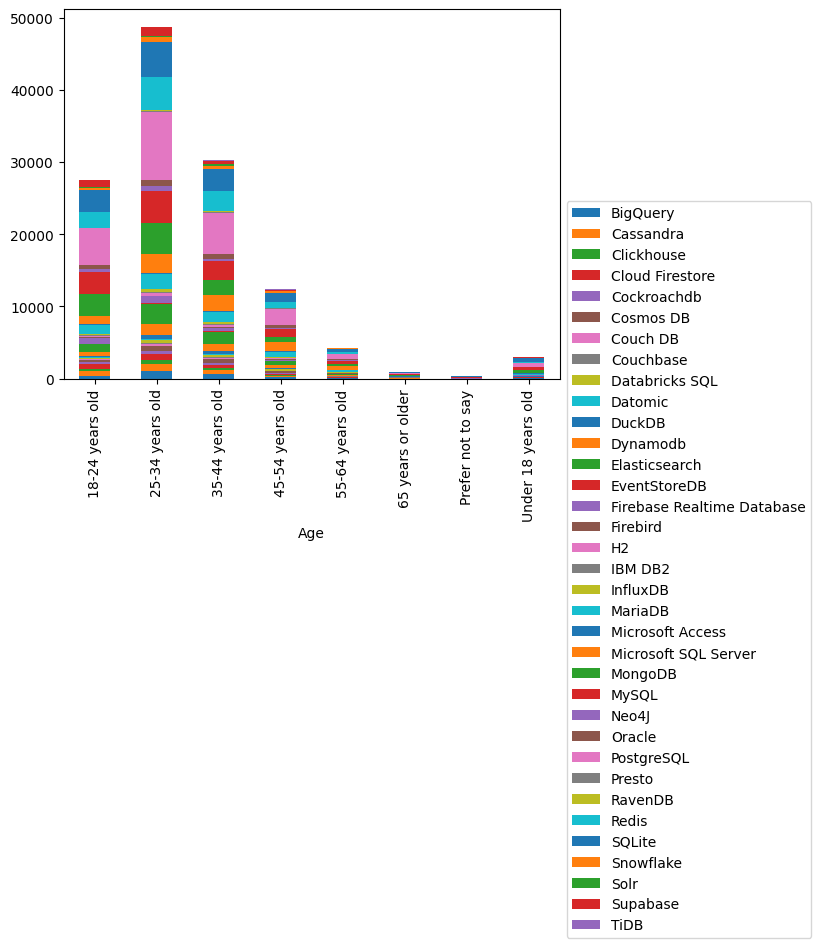

In [39]:
plt.figure(figsize=(12, 8))
df_plot.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


In [40]:
##Write your code here
df_filter = df[['Employment', 'JobSat']].dropna()
df_filter

,Employment,JobSat
10,"Employed, full-time",8.0
12,"Employed, full-time",8.0
15,"Employed, full-time",5.0
18,"Employed, full-time",10.0
20,"Employed, full-time",6.0
...,...,...
65178,"Employed, full-time",8.0
65241,"Employed, full-time",5.0
65265,"Employed, full-time",8.0
65351,"Employed, full-time;Independent contractor, fr...",8.0


In [41]:
df_filter['Employment'] = df_filter['Employment'].str.split(';')
df_expl = df_filter.explode('Employment')
df_expl['Employment'] = df_expl['Employment'].str.strip()
df_expl

,Employment,JobSat
10,"Employed, full-time",8.0
12,"Employed, full-time",8.0
15,"Employed, full-time",5.0
18,"Employed, full-time",10.0
20,"Employed, full-time",6.0
...,...,...
65241,"Employed, full-time",5.0
65265,"Employed, full-time",8.0
65351,"Employed, full-time",8.0
65351,"Independent contractor, freelancer, or self-em...",8.0


In [43]:
df_plot = df_expl.groupby(['Employment', 'JobSat']).size().unstack(fill_value=0)
df_plot

JobSat,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Employment,,,,,,,,,,,
"Employed, full-time",282,243,695,1045,1006,1760,3413,5770,6771,3284,1962
"Employed, part-time",19,28,54,84,87,134,250,388,436,194,134
"Independent contractor, freelancer, or self-employed",40,37,102,144,167,269,489,853,1101,559,514
"Not employed, and not looking for work",1,2,0,0,0,3,3,3,4,3,4
"Not employed, but looking for work",6,5,9,13,9,20,15,25,12,14,13
Retired,1,1,0,1,2,1,1,1,3,6,6
"Student, full-time",7,10,26,52,44,66,149,232,254,104,77
"Student, part-time",18,12,44,54,53,64,138,175,234,93,58


<Figure size 1200x800 with 0 Axes>

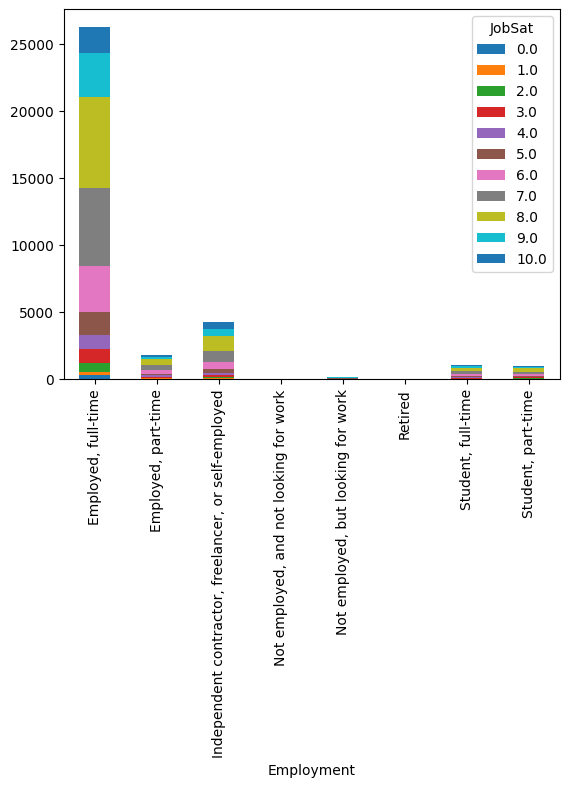

In [44]:
plt.figure(figsize=(12, 8))
df_plot.plot(kind='bar', stacked=True)
#plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [45]:
##Write your code here
df_filter = df[['Age', 'LanguageAdmired']].dropna()
df_filter

,Age,LanguageAdmired
1,35-44 years old,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,45-54 years old,C#
3,18-24 years old,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4,18-24 years old,C++;HTML/CSS;JavaScript;Lua;Python
5,Under 18 years old,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...
...,...,...
65409,35-44 years old,HTML/CSS;JavaScript;PowerShell
65427,25-34 years old,Python;SQL
65431,45-54 years old,Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...
65435,18-24 years old,Rust;SQL


In [46]:
df_filter['LanguageAdmired'] = df_filter['LanguageAdmired'].str.split(';')
df_expl = df_filter.explode('LanguageAdmired')
df_expl['LanguageAdmired'] = df_expl['LanguageAdmired'].str.strip()
df_expl

,Age,LanguageAdmired
1,35-44 years old,Bash/Shell (all shells)
1,35-44 years old,Go
1,35-44 years old,HTML/CSS
1,35-44 years old,Java
1,35-44 years old,JavaScript
...,...,...
65435,18-24 years old,Rust
65435,18-24 years old,SQL
65436,18-24 years old,JavaScript
65436,18-24 years old,Python


In [47]:
df_plot = df_expl.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)
df_plot

LanguageAdmired,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,Dart,Delphi,Elixir,Erlang,F#,Fortran,GDScript,Go,Groovy,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Lisp,Lua,MATLAB,MicroPython,Nim,OCaml,Objective-C,PHP,Perl,PowerShell,Prolog,Python,R,Ruby,Rust,SQL,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zephyr,Zig
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18-24 years old,36,25,505,2586,1977,1925,2311,57,18,22,638,21,106,33,42,24,281,1266,73,4523,256,2117,4728,108,817,122,639,146,94,28,79,41,833,41,642,31,5157,192,164,2001,4004,103,98,302,3567,48,110,22,167
25-34 years old,62,58,333,4495,1486,3469,2100,167,31,35,746,46,357,96,91,53,307,2238,230,6937,178,2947,7936,159,1347,135,648,170,94,30,77,103,1638,78,1138,30,7431,368,526,2197,7516,312,120,678,6696,118,153,34,148
35-44 years old,46,52,181,3024,879,2700,1168,177,16,29,323,85,315,99,71,38,130,1224,167,4580,93,1919,5161,68,790,125,309,88,100,20,47,94,1302,109,947,25,4239,262,576,1075,5055,233,67,419,3766,128,127,23,69
45-54 years old,34,47,109,1392,504,1328,626,60,15,19,127,162,126,46,40,29,56,436,81,1800,43,838,2051,40,252,51,133,58,57,16,18,49,556,128,489,16,1802,148,207,354,2382,91,24,184,1146,109,100,15,29
55-64 years old,15,22,87,562,308,532,366,20,15,5,35,92,29,16,17,24,9,112,40,715,16,358,819,29,77,40,31,32,27,2,9,28,237,88,196,7,741,67,51,116,1028,38,8,109,320,95,67,3,14
65 years or older,10,7,27,125,111,98,118,10,8,4,11,35,3,4,3,10,1,21,7,169,7,72,170,8,14,16,7,10,11,1,2,12,78,28,48,3,194,14,9,16,204,2,4,29,38,41,31,2,3
Prefer not to say,4,2,17,65,47,39,62,3,2,2,14,4,4,1,2,6,7,13,3,97,1,36,85,1,9,3,9,5,2,0,1,2,22,8,12,0,105,7,7,21,63,3,1,11,41,9,6,0,5
Under 18 years old,11,2,150,527,462,367,588,10,3,4,84,5,15,6,6,5,123,175,10,1030,40,400,919,9,143,17,184,7,73,9,10,8,127,6,131,2,1105,15,36,435,440,6,10,60,505,11,24,1,57


<Figure size 1500x800 with 0 Axes>

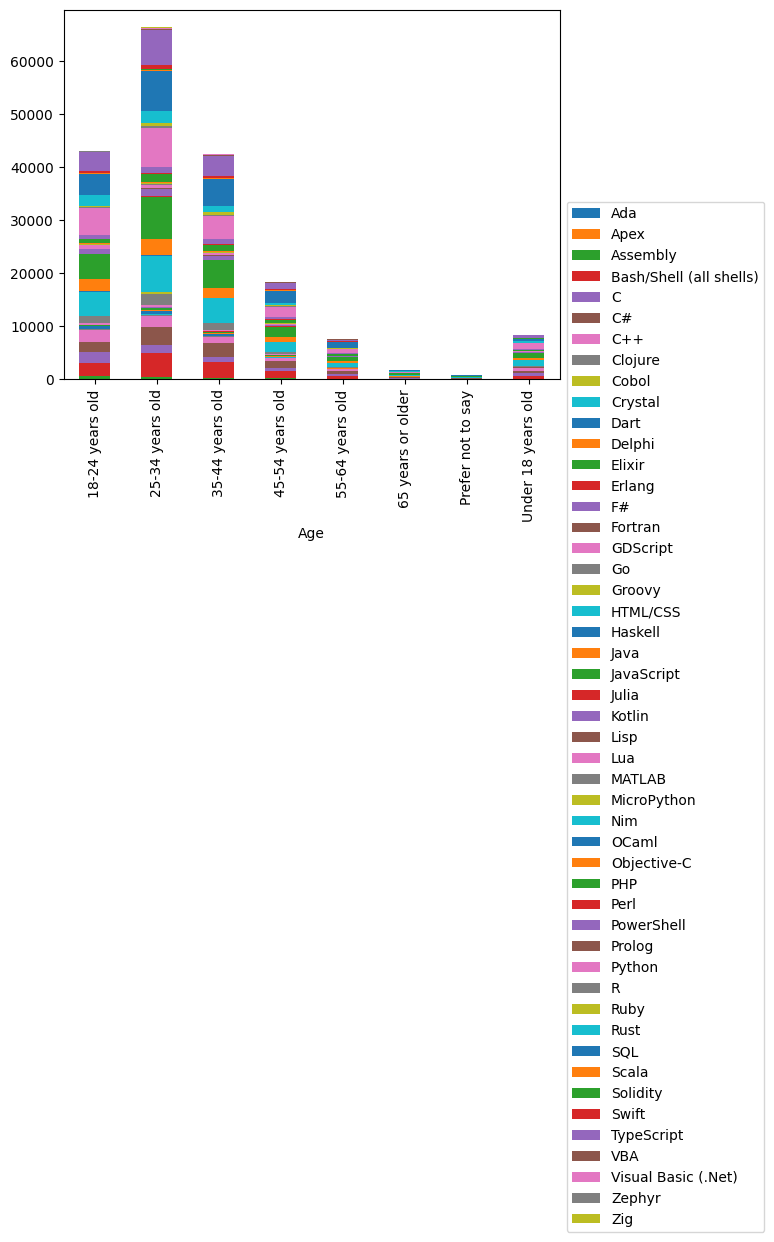

In [48]:
plt.figure(figsize=(15, 8))
df_plot.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [53]:
##Write your code here
df_filter = df[['PlatformAdmired', 'Employment']].dropna()
df_filter

,PlatformAdmired,Employment
1,Amazon Web Services (AWS);Heroku;Netlify,"Employed, full-time"
2,Google Cloud,"Employed, full-time"
3,Amazon Web Services (AWS),"Student, full-time"
5,Cloudflare,"Student, full-time"
7,Vercel,"Student, full-time;Not employed, but looking f..."
...,...,...
65401,Microsoft Azure,"Employed, full-time"
65409,Google Cloud;Vercel,"Employed, full-time"
65421,Amazon Web Services (AWS),"Employed, full-time"
65431,Microsoft Azure,"Employed, full-time"


In [54]:
df_filter['PlatformAdmired'] = df_filter['PlatformAdmired'].str.split(';')
df_expl = df_filter.explode('PlatformAdmired')
df_expl['PlatformAdmired'] = df_expl['PlatformAdmired'].str.strip()
df_expl

,PlatformAdmired,Employment
1,Amazon Web Services (AWS),"Employed, full-time"
1,Heroku,"Employed, full-time"
1,Netlify,"Employed, full-time"
2,Google Cloud,"Employed, full-time"
3,Amazon Web Services (AWS),"Student, full-time"
...,...,...
65431,Microsoft Azure,"Employed, full-time"
65436,Cloudflare,"Student, full-time"
65436,Google Cloud,"Student, full-time"
65436,Netlify,"Student, full-time"


In [55]:
df_expl['Employment'] = df_expl['Employment'].str.split(';')
df_expl = df_expl.explode('Employment')
df_expl['Employment'] = df_expl['Employment'].str.strip()
df_expl

,PlatformAdmired,Employment
1,Amazon Web Services (AWS),"Employed, full-time"
1,Heroku,"Employed, full-time"
1,Netlify,"Employed, full-time"
2,Google Cloud,"Employed, full-time"
3,Amazon Web Services (AWS),"Student, full-time"
...,...,...
65431,Microsoft Azure,"Employed, full-time"
65436,Cloudflare,"Student, full-time"
65436,Google Cloud,"Student, full-time"
65436,Netlify,"Student, full-time"


In [56]:
df_plot = df_expl.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)
df_plot

PlatformAdmired,Alibaba Cloud,Amazon Web Services (AWS),Cloudflare,Colocation,Databricks,Digital Ocean,Firebase,Fly.io,Google Cloud,Heroku,Hetzner,IBM Cloud Or Watson,"Linode, now Akamai",Managed Hosting,Microsoft Azure,Netlify,OVH,OpenShift,OpenStack,Oracle Cloud Infrastructure (OCI),PythonAnywhere,Render,Scaleway,Supabase,VMware,Vercel,Vultr
Employment,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Employed, full-time",129,11336,3042,128,421,2148,2283,504,4650,669,1062,121,494,573,6329,966,477,478,247,467,159,328,135,642,795,1853,246
"Employed, part-time",26,643,361,23,31,229,261,48,403,71,195,26,60,93,364,119,71,43,37,52,40,57,20,101,109,312,38
I prefer not to say,10,40,43,5,5,21,24,9,41,9,17,10,15,10,23,12,10,10,7,14,10,9,7,13,15,24,10
"Independent contractor, freelancer, or self-employed",49,2733,1346,61,70,978,953,206,1454,266,563,51,265,317,1417,410,254,89,82,157,96,151,79,347,249,834,148
"Not employed, and not looking for work",13,78,79,7,8,34,51,17,64,19,21,10,16,11,50,30,17,8,9,18,19,22,11,18,33,59,15
"Not employed, but looking for work",27,639,290,15,30,176,302,54,376,80,75,23,48,36,232,183,39,20,27,51,51,100,10,108,69,362,23
Retired,12,52,20,4,5,21,15,5,41,7,5,6,5,15,37,8,6,7,10,10,12,7,7,9,8,10,8
"Student, full-time",36,808,788,18,21,261,544,63,677,107,210,27,87,71,409,279,86,23,36,144,106,160,16,217,179,749,53
"Student, part-time",9,400,218,11,22,131,189,25,276,46,78,11,34,41,249,82,46,32,23,40,33,42,11,75,81,221,20


<Figure size 1500x800 with 0 Axes>

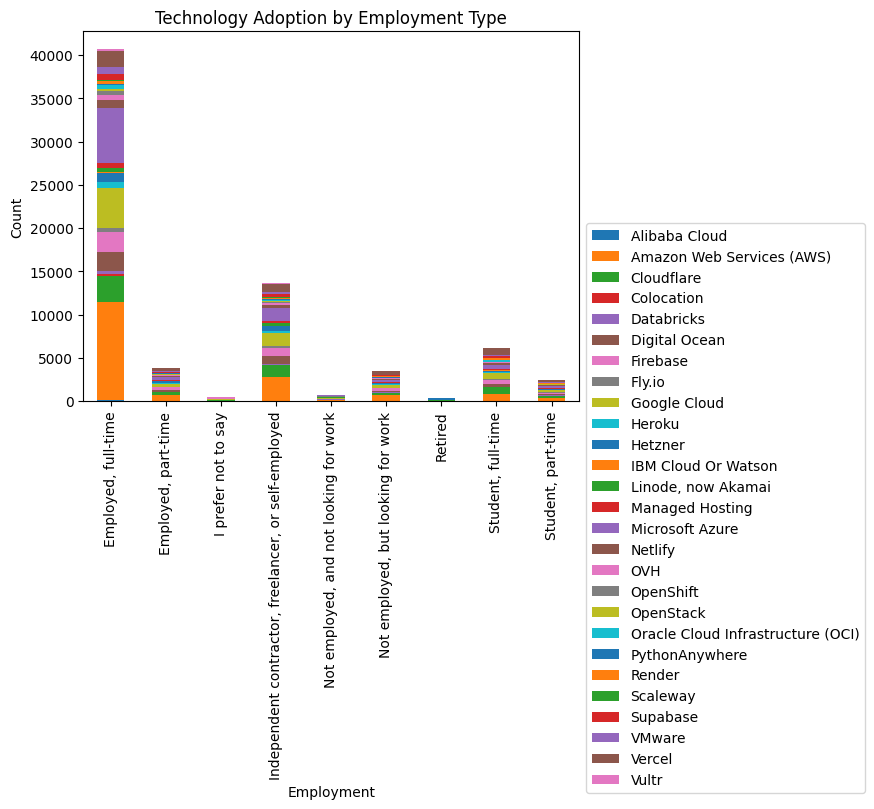

In [58]:
plt.figure(figsize=(15, 8))
df_plot.plot(kind='bar', stacked=True)
plt.title('Technology Adoption by Employment Type')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
